# Import 
<a id="import"></a>

In [ ]:
!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887

In [ ]:
from fastai.imports import *
from fastai.structured import *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
%time data = pd.read_table('../input/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

It's good practice to do not look at the test set so I am going to seperate test data from total data 

In [ ]:
train_df = data[data['issue_d'] < '2015-6-01']
test_df = data[data['issue_d'] >= '2015-6-01']

# Preprocessing
<a id="structure_of_data"></a>

In [243]:
train = train_df.copy()
test = test_df.copy()

In [244]:
train.dtypes.value_counts()

float64           49
object            20
int64              3
datetime64[ns]     1
dtype: int64

In [245]:
print(train.shape)
print(test.shape)

(598978, 73)
(256991, 73)


**Destribution of dependent variable**

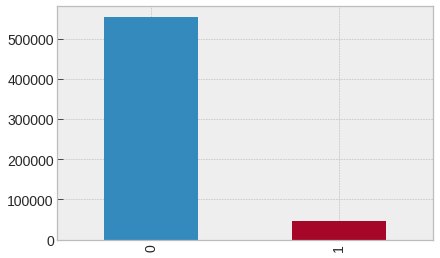

In [246]:
train['default_ind'].value_counts().plot.bar()

**Describution of independent variable**

In [247]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [248]:
train.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,5.989780e+05,5.989780e+05,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,5.989780e+05,598978.000000,598978.000000,598978.000000,284010.000000,85758.000000,598978.000000,598978.000000,5.989780e+05,598637.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,598922.000000,138227.000000,598978.0,0.0,0.0,598978.000000,5.316650e+05,5.316650e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.316650e+05,0.0,0.0,0.0,598978.000000
mean,2.044157e+07,2.231985e+07,14540.642519,14521.789031,14478.973948,13.520911,434.562058,7.397280e+04,17.638408,0.297171,0.731226,34.131985,72.798934,11.357197,0.177768,1.650743e+04,55.838410,25.226733,5946.808215,5945.054198,10073.087967,10029.098206,7730.781476,2274.617695,0.439511,67.249287,7.075547,2815.793083,0.011255,43.363084,1.0,NaN,NaN,0.004625,2.089273e+02,1.389905e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.111062e+04,NaN,NaN,NaN,0.077058
std,1.619182e+07,1.711491e+07,8336.476483,8327.529212,8337.695086,4.370961,242.892709,5.676163e+04,8.070746,0.828659,1.000495,21.796878,29.075841,5.138351,0.547331,2.093414e+04,23.711238,11.717682,7330.142896,7328.397671,8091.548244,8070.839362,6923.288534,2270.974523,4.245093,491.327816,74.587986,5398.379951,0.119935,21.860221,0.0,NaN,NaN,0.075951,1.268440e+04,1.525544e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.638326e+04,NaN,NaN,NaN,0.266684
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,5.937838e+06,7.205072e+06,8000.000000,8000.000000,8000.000000,10.160000,259.642500,4.500000e+04,11.610000,0.000000,0.000000,16.000000,52.000000,8.000000,0.000000,6.462000e+03,38.800000,17.000000,0.000000,0.000000,4242.350000,4219.600000,2764.050000,821.000000,0.000000,0.000000,0.000000,305.080000,0.000000,26.000000,1.0,NaN,NaN,0.000000,0.000000e+00,2.919700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.370000e+04,NaN,NaN,NaN,0.000000
50%,1.564996e+07,1.763377e+07,12600.000000,12525.000000,12500.000000,13.330000,381.840000,6.300000e+04,17.210000,0.000000,0.000000,31.000000,72.000000,10.000000,0.000000,1.187000e+04,57.000000,24.000000,3032.270000,3031.615000,7631.015000,7593.020000,5393.340000,1573.125000,0.000000,0.000000,0.000000,507.380000,0.000000,43.000000,1.0,NaN,NaN,0.000000,0.000000e+00,8.098600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320000e+04,NaN,NaN,NaN,0.000000
75%,3.671239e+07,3.943412e+07,20000.000000,20000.000000,20000.000000,16.290000,568.900000,9.000000e+04,23.290000,0.000000,1.000000,50.000000,99.000000,14.000000,0.000000,2.061800e+04,74.300000,32.000000,10070.040000,10066.860000,13403.250000,13349.895000,10150.382500,2871.087500,0.000000,0.000000,0.000000,1506.602500,0.000000,60.000000,1.0,NaN,NaN,0.000000,0.000000e+00,2.084020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.870000e+04,NaN,NaN,NaN,0.000000
max,5.095230e+07,5.433202e+07,35000.000000,35000.

In [249]:
train.describe(exclude=np.number)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,598978,598978,598978,564513,570873,598978,598978,598978,598978,121801,598978,598960,598978,598978,598978,598978,598522,354291,598935,598978,0.0
unique,2,7,35,235312,11,6,3,96,2,120325,14,60990,901,50,677,2,97,3,102,1,0.0
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,2014-10-01 00:00:00,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,NaN
freq,427239,173419,39269,7971,195407,301448,210453,37442,598973,230,356155,248846,6735,90043,4563,361847,273965,311462,451313,598978,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
train.dtypes.value_counts()

float64           49
object            20
int64              3
datetime64[ns]     1
dtype: int64

## EDA

## Similar Distributions:
<a id="similar_distributions"></a>
We will start by exploring the distribution of the loan amounts and see when did the loan amount issued increased significantly. <br>

<h4> What we need to know: </h4> <br>
<ul>
<li> Understand what amount was <b>mostly issued</b> to borrowers. </li>
<li> Which <b>year</b> issued the most loans. </li>
<li> The distribution of loan amounts is a <b>multinomial distribution </b>.</li>
</ul>
<h4> Summary: </h4><br>
<ul>
<li> Most of the <b>loans issued</b> were in the range of 10,000 to 20,000 USD. </li>
<li> The <b>year of 2015</b> was the year were most loans were issued.</li> 
<li> Loans were issued in an <b>incremental manner</b>. (Possible due to a recovery in the U.S economy) </li>
<li> The loans <b>applied</b> by potential borrowers, the amount <b>issued</b> to the borrowers and the amount <b>funded</b> by investors are similarly distributed, <b>meaning</b> that it is most likely that qualified borrowers are going to get the loan they had applied for. </li>

</ul>




/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total committed by Investors')

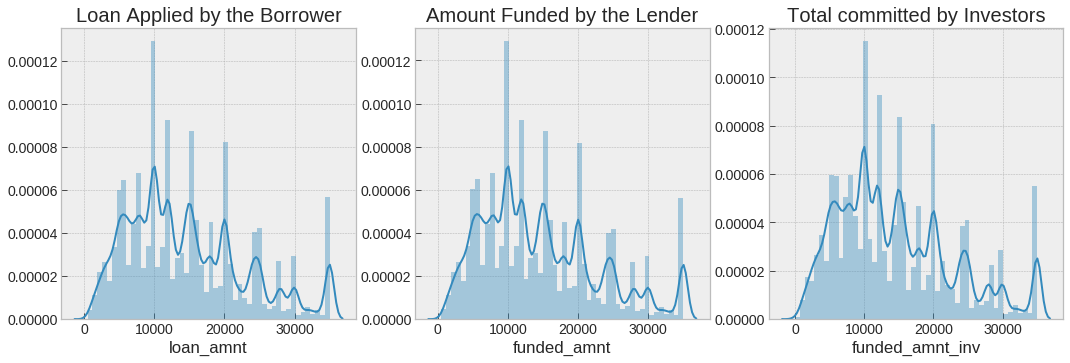

In [251]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(train['loan_amnt'], ax=ax[0])
sns.distplot(train['funded_amnt'], ax=ax[1])
sns.distplot(train['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")

 ## Loan Purpose
 
 
 
 **Debt Consolidation** stands as clear winner for loan purpose, with more than 350K loans — or 58% from the total.<br/>

Other highlights include:

**Credit Card**  — more than 130K (~20%)<br>
**Home Improvement **— more than 135K (~6%)<br>
**Other Purposes** — less than 30K (~4%)

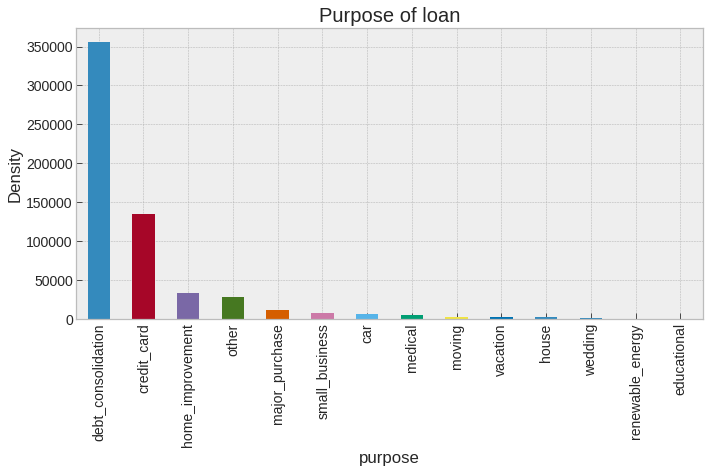

In [252]:
train.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


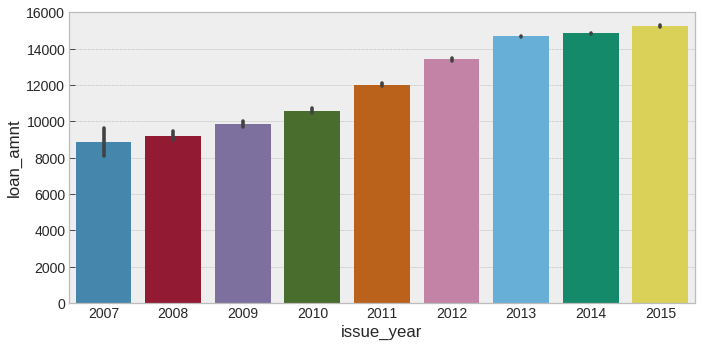

In [253]:
train['issue_year'] = train['issue_d'].dt.year
plt.figure(figsize=(10,5))
sns.barplot(x='issue_year',y='loan_amnt',data=train)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Yearwise Distribution of defaulter')

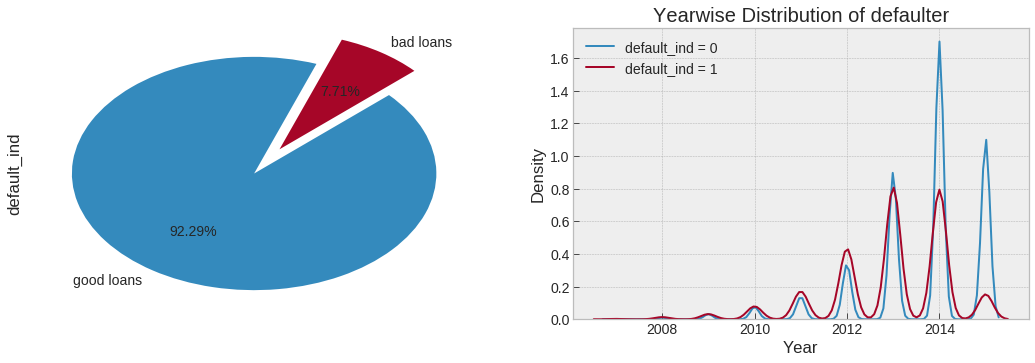

In [254]:
# Loan Status 
fig, ax = plt.subplots(1, 2, figsize=(16,5))
train['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['good loans','bad loans'],
                                             autopct='%1.2f%%',startangle=70,ax=ax[0])
sns.kdeplot(train.loc[train['default_ind']==0,'issue_year'],label='default_ind = 0')
sns.kdeplot(train.loc[train['default_ind']==1,'issue_year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')

## Loan Grade

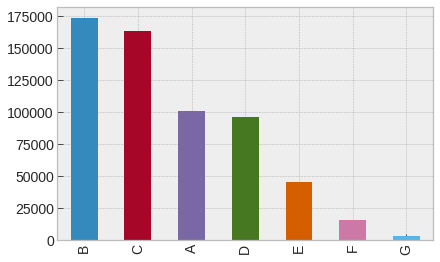

In [255]:
train.grade.value_counts().plot.bar()

(Text(0.5,1,'default_ind=0 vs grade'), Text(0.5,1,'default_ind=1 vs grade'))

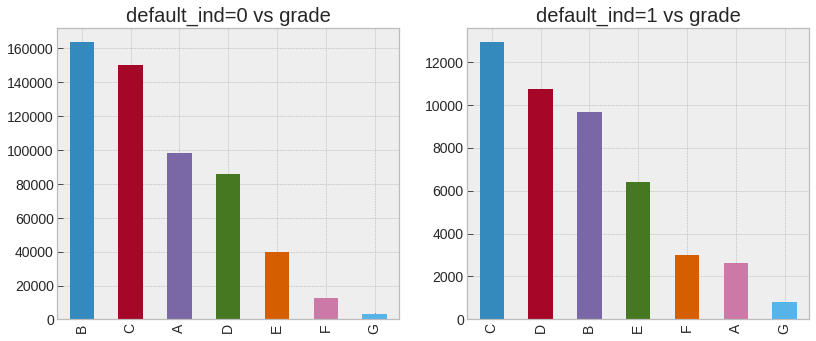

In [256]:
fig,array=plt.subplots(1,2,figsize=(12,5))
train.loc[train['default_ind']==0,'grade'].value_counts().plot.bar(ax=array[0])
train.loc[train['default_ind']==1,'grade'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs grade'),array[1].set_title('default_ind=1 vs grade')

## Loan issued by regions
<a id="loan_issued_by_regions"><a/>

In [257]:
train.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL', 'NY', 'PA', 'MN', 'NJ', 'KY',
       'OH', 'SC', 'RI', 'LA', 'MA', 'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS', 'TN', 'IA', 'NE', 'ID', 'IN', 'ME'],
      dtype=object)

In [258]:
# Make a list with each of the regions by state.

west = ['WA','CA', 'OR', 'UT','ID','CO', 'NV', 'NM', 'AK', 'MT', 'HI', 'WY']
south_east = ['AZ', 'TX', 'OK','GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

train['region'] = np.nan

def fix_regions(addr_state):
        if addr_state in west:
            return 'west'
        elif addr_state in south_east:
            return 'south east'
        elif addr_state in mid_west:
            return 'mid west'
        else:
            return 'north east'
        
train['region'] = train['addr_state'].apply(fix_regions)
test['region'] = test['addr_state'].apply(fix_regions)

Text(0.5,1,'Loans issued by Region')

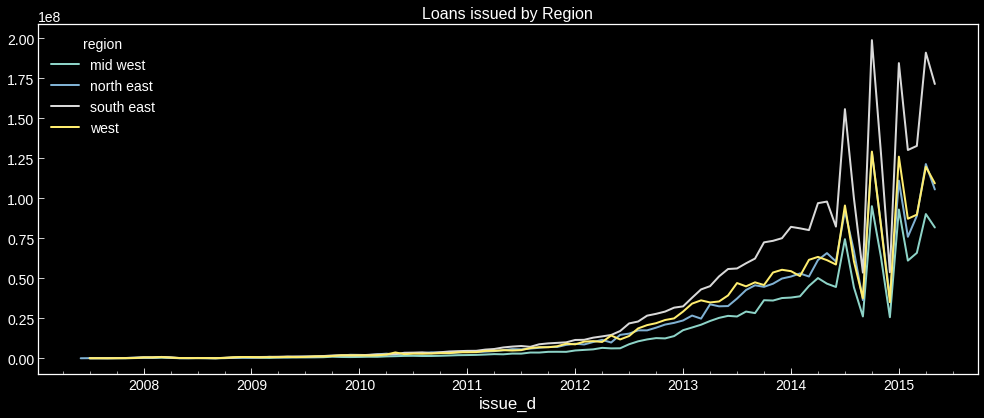

In [259]:
date_amt_region = train[['loan_amnt','issue_d','region']]
plt.style.use('dark_background')
cmap = plt.cm.Set3
by_issued_amount = date_amt_region.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

## Converting emp length into integer

In [260]:
train.emp_length.unique()
for df in (train,test):
    df.loc[df['emp_length']=='10+ years','emp_len'] = 10
    df.loc[df['emp_length']=='<1 year','emp_len'] = .5
    df.loc[df['emp_length']=='1 year','emp_len'] = 1
    df.loc[df['emp_length']=='3 years','emp_len'] = 3
    df.loc[df['emp_length']=='8 years','emp_len'] = 8
    df.loc[df['emp_length']=='9 years','emp_len'] = 9
    df.loc[df['emp_length']=='4 years','emp_len'] = 4
    df.loc[df['emp_length']=='5 years','emp_len'] = 5
    df.loc[df['emp_length']=='6 years','emp_len'] = 6
    df.loc[df['emp_length']=='2 years','emp_len'] = 2
    df.loc[df['emp_length']=='7 years','emp_len'] = 7
    df.loc[df['emp_length']=='nan','emp_len'] = 0

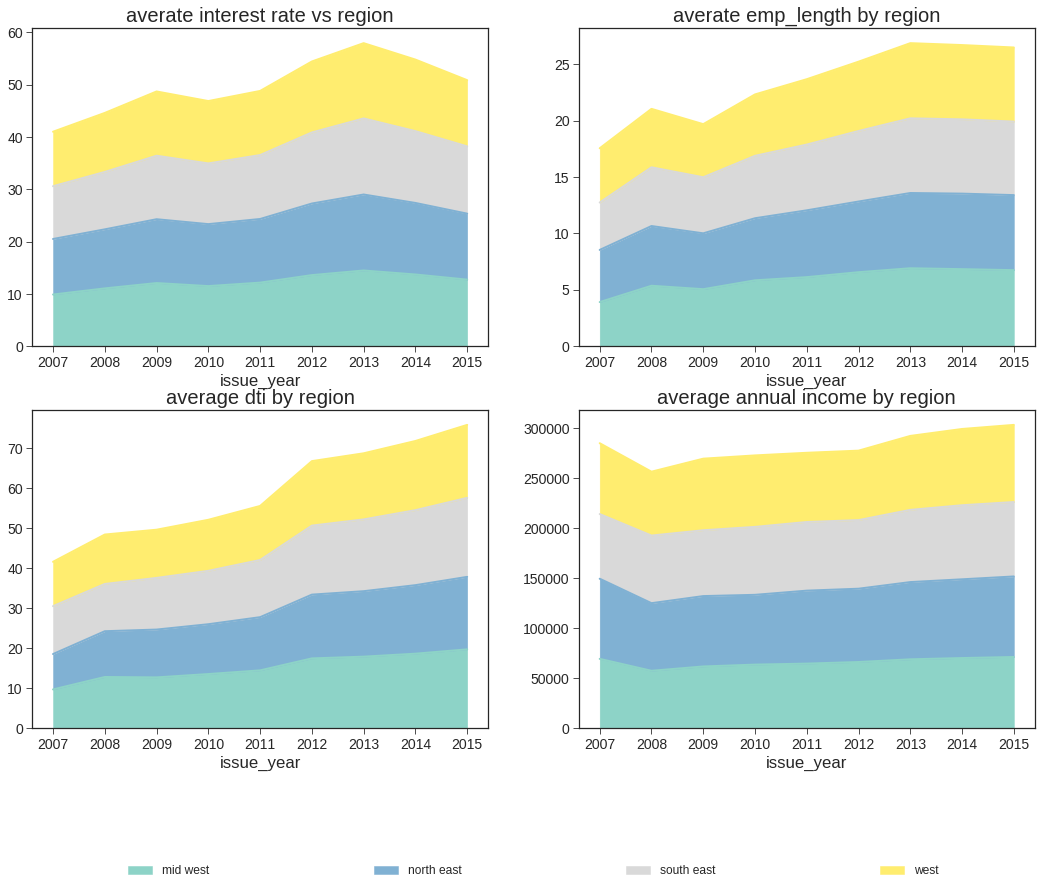

In [261]:
# Loan issued by Region ,Credit Score and grade
plt.style.use('seaborn-ticks')


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,12))

regional_interest_rate = train.groupby(['issue_year', 'region']).int_rate.mean()
regional_interest_rate.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax1)

regional_emp_length = train.groupby(['issue_year', 'region']).emp_len.mean()
regional_emp_length.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax2)

regional_dti = train.groupby(['issue_year', 'region']).dti.mean()
regional_dti.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax3)

regional_interest_rate = train.groupby(['issue_year', 'region']).annual_inc.mean()
regional_interest_rate.unstack().plot(kind='area',  stacked=True,colormap=cmap, grid=False,
                                      legend=False, figsize=(16,12),ax=ax4)
ax1.set_title('averate interest rate vs region'),ax2.set_title('averate emp_length by region')
ax3.set_title('average dti by region'),ax4.set_title('average annual income by region')

ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [262]:
print(train.int_rate.mean())
print(train.annual_inc.mean())

13.520910684598922
73972.8004821713


## Income Category

In [263]:
train['income_category'] = np.nan
train.loc[train['annual_inc'] <= 100000,'income_category'] = 'Low'
train.loc[(train['annual_inc'] > 100000) & (train['annual_inc'] <= 200000),'income_category'] = 'Medium'
train.loc[train['annual_inc'] > 200000,'income_category'] = 'High'

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


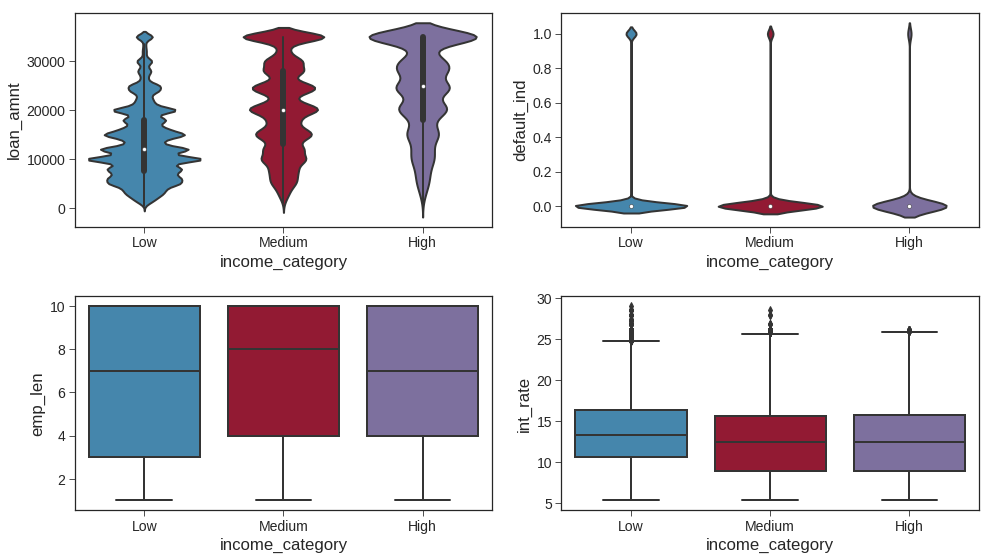

In [264]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.style.use('bmh')
sns.violinplot(x="income_category", y="loan_amnt", data=train, ax=ax1 )
sns.violinplot(x="income_category", y="default_ind", data=train, ax=ax2)
sns.boxplot(x="income_category", y="emp_len", data=train, ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=train, ax=ax4)
plt.tight_layout(h_pad=1.5)

## Bad Loans
<a id="bad loans"><a/>

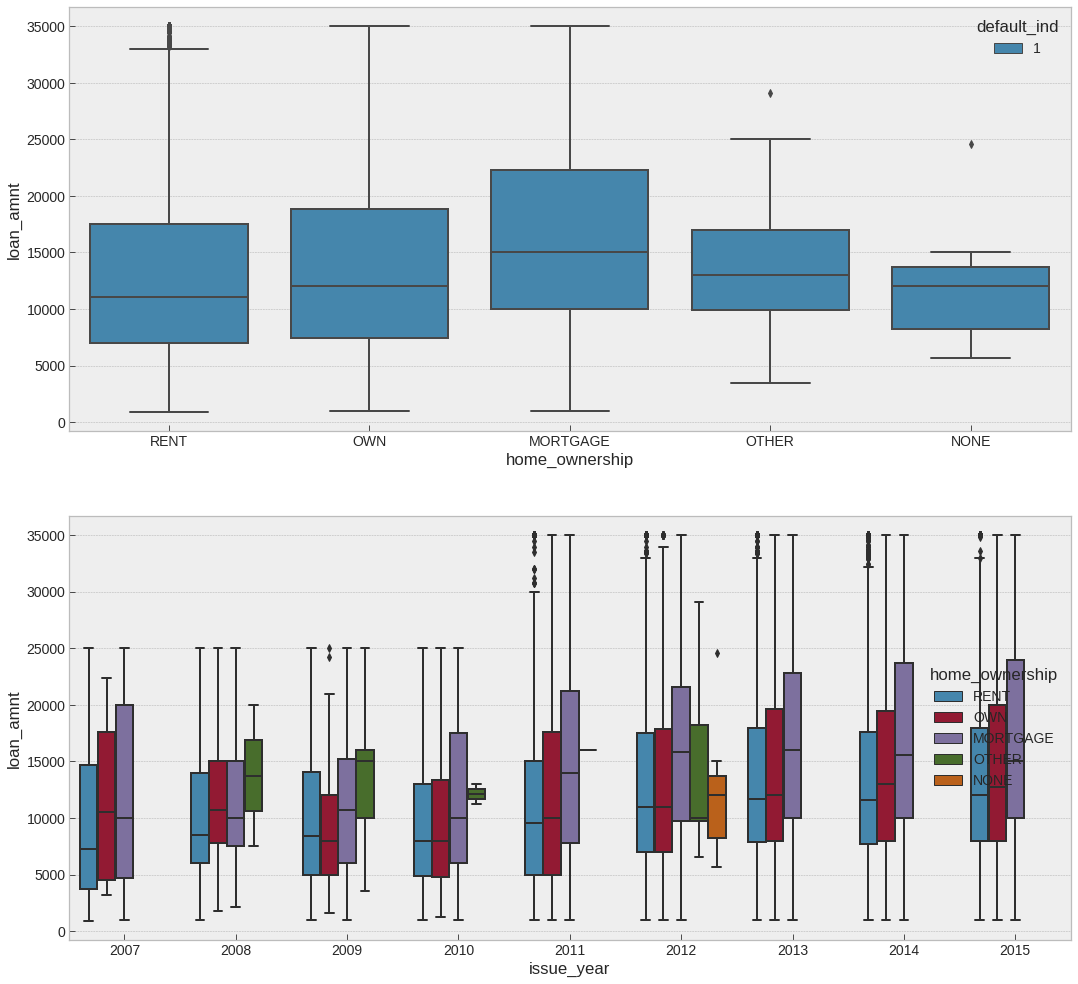

In [265]:
defaulter = train.loc[train['default_ind']==1]
plt.figure(figsize=(16,16))
plt.subplot(211)
sns.boxplot(data=defaulter,x = 'home_ownership',y='loan_amnt',hue='default_ind')
plt.subplot(212)
sns.boxplot(data=defaulter,x='issue_year',y='loan_amnt',hue='home_ownership')

## Missing Value Treatement

In [266]:
whole_df = pd.concat([train,test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [267]:
def treat_missing(df):
    df.dropna(thresh=len(df)/2,axis=1,inplace=True)
    for c in df.columns:
        if df[c].dtype == 'object':
            df.fillna(df[c].mode()[0],inplace=True)
        else:
            df.fillna(df[c].median(),inplace=True)

In [268]:
whole_df.drop('issue_d',inplace=True,axis=1)

In [269]:
treat_missing(whole_df)

## Treating Categorical Values

In [274]:
whole_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

application_type        2
grade                   7
home_ownership          6
income_category         4
initial_list_status     2
next_pymnt_d            4
purpose                14
pymnt_plan              2
region                  4
term                    2
verification_status     3
dtype: int64

In [272]:
to_drop = ['sub_grade','emp_title','title','zip_code',
           'addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d','emp_length']

In [273]:
whole_df.drop(to_drop,axis=1,inplace=True)

## Label Encoding

In [282]:
whole_df.dtypes.value_counts()

float64    32
object      8
int64       6
dtype: int64

**Label Encoding**

In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in whole_df.columns:
    if whole_df[c].dtype == 'object':
        if len(list(whole_df[c].unique())) <= 2:
            whole_df[c] = le.fit_transform(whole_df[c])

**One Hot Encoding**

In [285]:
print(whole_df.shape)
whole_df = pd.get_dummies(whole_df)
print(whole_df.shape)

(855969, 46)
(855969, 70)


## Dependent and Independent Variable

In [349]:
def split_vals(a,n):return a[:n].copy(),a[n:].copy()

In [350]:
train,test = split_vals(whole_df,len(train_df))

In [351]:
train.shape,test.shape

((598978, 70), (256991, 70))

In [352]:
X = train.copy()
y = X.pop('default_ind')
y_test = test.pop('default_ind')

## Fitting the model

**Logistic Regression**

In [353]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(n_jobs=-1,C=10)
%time m.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


CPU times: user 21 s, sys: 520 ms, total: 21.5 s
Wall time: 21.5 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [354]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = m.predict(test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[256618     62]
 [   126    185]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.75      0.59      0.66       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.87      0.80      0.83    256991
weighted avg       1.00      1.00      1.00    256991



**Random Forest**

In [357]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,n_estimators=100,min_samples_leaf=3)
%time m.fit(X,y)

CPU times: user 21.6 s, sys: 264 ms, total: 21.9 s
Wall time: 5.95 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [358]:
y_pred = m.predict(test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[256588     92]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.73      0.80      0.76       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.86      0.90      0.88    256991
weighted avg       1.00      1.00      1.00    256991



**Light GBM**

In [359]:
from lightgbm import LGBMClassifier
m = LGBMClassifier(n_estimators=100,num_leaves=3)
%time m.fit(X,y)

CPU times: user 19.1 s, sys: 916 ms, total: 20 s
Wall time: 6.3 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=3, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [360]:
y_pred = m.predict(test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[256658     22]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.92      0.80      0.85       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.96      0.90      0.93    256991
weighted avg       1.00      1.00      1.00    256991



## Feature Importnace

In [361]:
def feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [364]:
fi = feat_importance(m, X); fi[:20]

,cols,imp
38,total_rec_prncp,55
22,out_prncp,27
15,installment,25
18,last_pymnt_amnt,22
44,next_pymnt_d_0.0,19
27,recoveries,18
8,funded_amnt,13
12,id,7
37,total_rec_late_fee,4
17,issue_year,2


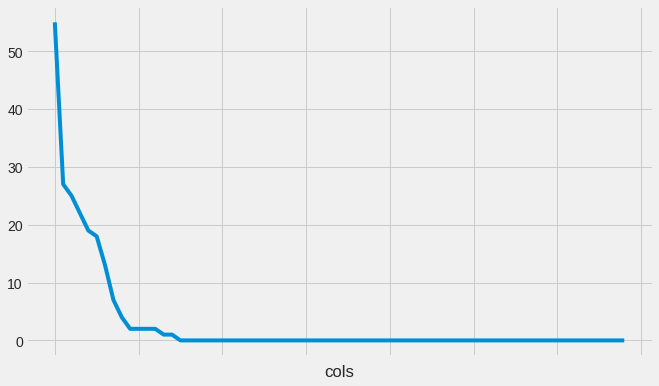

In [365]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False)
plt.style.use("fivethirtyeight")

In [366]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

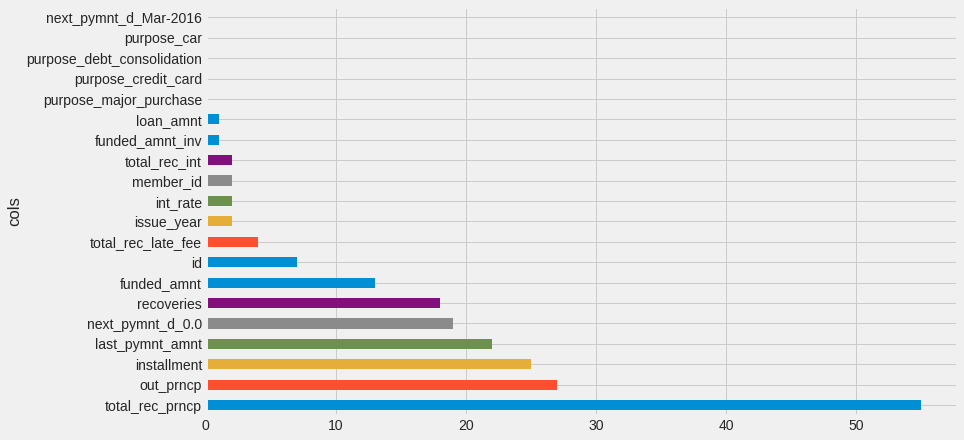

In [367]:
plot_fi(fi[:20])

In [368]:
to_keep = fi[fi.imp>1].cols; len(to_keep)

13

In [369]:
X_keep = X[to_keep].copy()
# X_train, X_valid = split_vals(X_keep, len(X)*.3)

In [370]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(n_jobs=-1,C=10)
%time m.fit(X_keep,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


CPU times: user 7.38 s, sys: 64 ms, total: 7.45 s
Wall time: 7.45 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [371]:
y_pred = m.predict(test[X_keep.columns])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[256627     53]
 [   117    194]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.79      0.62      0.70       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.89      0.81      0.85    256991
weighted avg       1.00      1.00      1.00    256991



In [372]:
m = LGBMClassifier(n_estimators=100,num_leaves=3)
%time m.fit(X_keep,y)

CPU times: user 7.64 s, sys: 112 ms, total: 7.75 s
Wall time: 2.15 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=3, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [373]:
y_pred = m.predict(test[X_keep.columns])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[256658     22]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.92      0.80      0.85       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.96      0.90      0.93    256991
weighted avg       1.00      1.00      1.00    256991



# Removing redundant features
One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

## Clustering Analysis

In [374]:
import scipy 
from scipy.cluster import hierarchy as hc

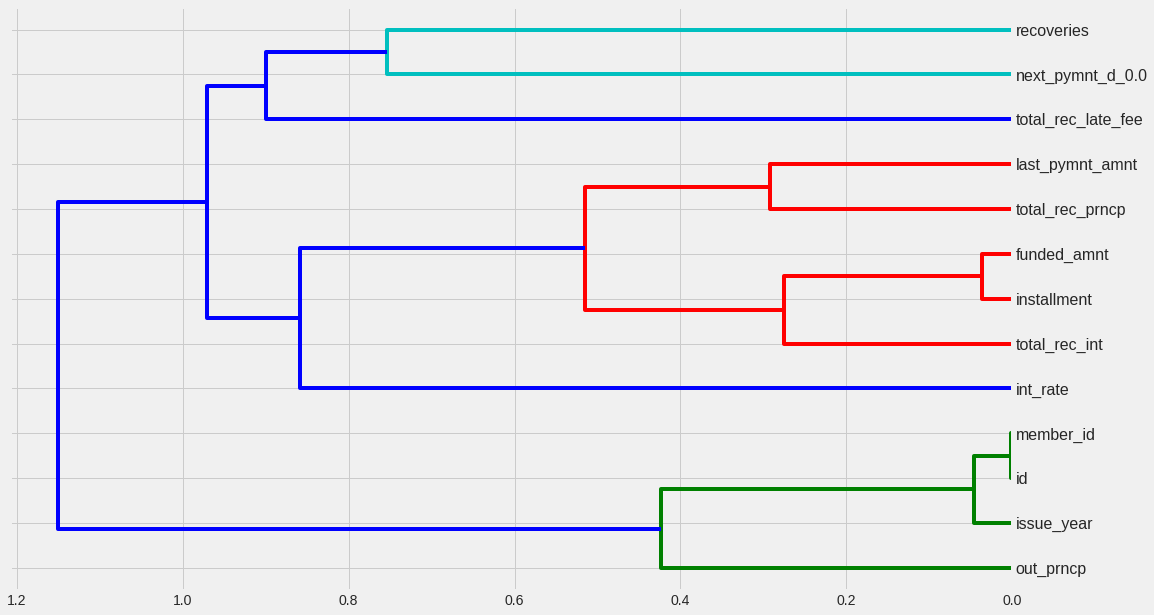

In [375]:
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [376]:
to_drop = ['id']
X_keep.drop(to_drop,axis=1,inplace=True)

In [377]:
m = LGBMClassifier(n_estimators=100,num_leaves=3)
%time m.fit(X_keep,y)

CPU times: user 7.33 s, sys: 116 ms, total: 7.45 s
Wall time: 2.05 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=3, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [378]:
y_pred = m.predict(test[X_keep.columns])
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[256659     21]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.92      0.80      0.86       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.96      0.90      0.93    256991
weighted avg       1.00      1.00      1.00    256991

